# Summary of Inter GPU Point-to-Point Communication within a Node

In [1]:
%matplotlib inline
import os
from pathlib import Path
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

SAVE_FIGURE = False
FIGURE_FONT_SIZE = 12

plt.rcParams["figure.dpi"] = 120
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = FIGURE_FONT_SIZE
pd.set_option('display.max_columns', 20)


project_dir = Path(os.getcwd()).parents[0]
file_anode_results = f'{project_dir}/intra_anode/intra_anode.out'
file_vnode_results = f'{project_dir}/intra_vnode/intra_vnode.out'
bandwidth_title = r'Bidirectional P2P=Enabled Bandwidth Matrix'
latency_title = r'P2P=Enabled Latency \(P2P Writes\) Matrix'

In [2]:
# function definitions

def read_table(filepath, title, nlines):
    pattern = title
    in_data = False
    lines = []
    with open(filepath) as inf:
        for line in inf:
            if len(lines) == nlines:
                break
            line = line.strip()
            if not in_data:
                if re.match(pattern, line):
                    in_data = True
                    continue
            else:
                lines.append(line)

    column_line = lines[0]
    value_lines = lines[1:]
    columns = column_line.split()[1:]
    index = [line.split()[0] for line in value_lines]
    values = [map(float, line.split()[1:]) for line in value_lines]
    return pd.DataFrame(data=values, index=index, columns=columns)

def plot_heatmap(data, title, fmt=None):
    if fmt == None:
        fmt = '.0f'
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sns.heatmap(data, ax=ax, square=True, cmap='Blues', annot=True, fmt=fmt, annot_kws={'fontsize':8})
    if SAVE_FIGURE:
        ax.set_title(None)
        fig.savefig(f'{title}.pdf')
    ax.set_title(title)

## Bandwidth

In [3]:
bw_anode = read_table(file_anode_results, bandwidth_title, 9)
bw_vnode = read_table(file_vnode_results, bandwidth_title, 5)

In [4]:
print(f'{bandwidth_title} (GB/s) - ComputeNode(A)')
bw_anode

Bidirectional P2P=Enabled Bandwidth Matrix (GB/s) - ComputeNode(A)


,0,1,2,3,4,5,6,7
0,1291.86,410.10,410.71,411.04,412.22,411.46,412.88,412.15
1,409.42,1290.79,410.06,410.09,409.95,410.27,409.20,410.26
2,411.56,410.20,1291.86,413.19,416.39,416.06,414.96,415.76
3,410.82,411.42,413.32,1290.79,412.80,413.97,413.46,412.66
4,413.62,411.72,417.62,414.97,1309.72,519.05,519.66,519.74
5,413.41,412.65,417.95,415.07,517.17,1303.71,518.19,518.02
6,414.22,411.21,417.06,415.12,517.16,515.45,1302.08,517.84
7,414.64,411.80,417.10,414.88,518.54,518.24,521.56,1305.89


In [5]:
print(f'{bandwidth_title} (GB/s) - ComputeNode(V)')
bw_vnode

Bidirectional P2P=Enabled Bandwidth Matrix (GB/s) - ComputeNode(V)


,0,1,2,3
0,779.50,96.90,96.90,96.90
1,96.85,780.66,96.91,96.91
2,96.91,96.85,779.50,96.91
3,96.90,96.90,96.91,779.11


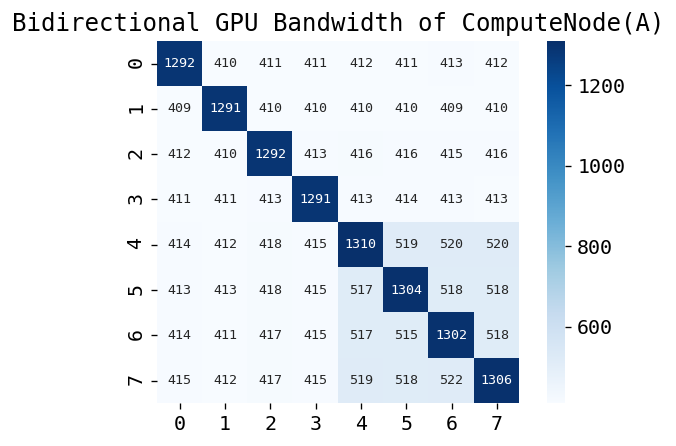

In [6]:
plot_heatmap(bw_anode, 'Bidirectional GPU Bandwidth of ComputeNode(A)')

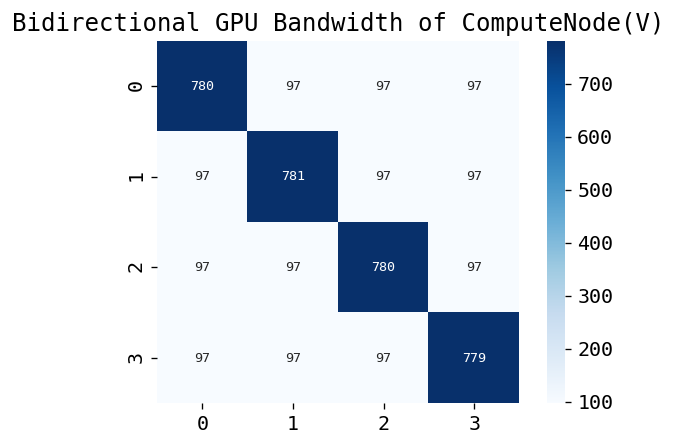

In [7]:
plot_heatmap(bw_vnode, 'Bidirectional GPU Bandwidth of ComputeNode(V)')

## Latency

In [8]:
lat_anode = read_table(file_anode_results, latency_title, 9)
lat_vnode = read_table(file_vnode_results, latency_title, 5)

In [9]:
print(f'{latency_title} (us) - ComputeNode(A)')
lat_anode

P2P=Enabled Latency \(P2P Writes\) Matrix (us) - ComputeNode(A)


,0,1,2,3,4,5,6,7
0,3.13,3.36,3.32,3.32,3.32,3.25,3.29,3.24
1,3.28,2.96,3.32,3.21,3.25,3.25,3.22,3.26
2,3.30,3.24,3.14,3.25,3.27,3.25,3.24,3.26
3,3.31,3.26,3.21,3.18,3.24,3.20,3.25,3.26
4,2.81,2.87,2.81,2.88,2.39,2.81,2.83,2.90
5,2.81,2.86,2.80,2.81,2.80,2.28,3.05,3.40
6,2.80,2.81,2.80,2.86,2.80,2.91,2.49,2.86
7,2.80,2.91,2.83,2.82,2.87,2.88,2.80,2.30


In [10]:
print(f'{latency_title} (us) - ComputeNode(V)')
lat_vnode

P2P=Enabled Latency \(P2P Writes\) Matrix (us) - ComputeNode(V)


,0,1,2,3
0,1.81,1.87,1.90,1.90
1,1.86,1.65,1.86,1.85
2,1.94,1.95,1.65,1.95
3,2.00,2.00,2.00,1.68


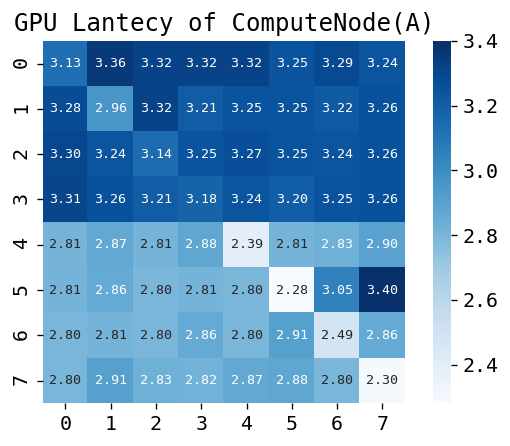

In [11]:
plot_heatmap(lat_anode, 'GPU Lantecy of ComputeNode(A)', fmt='.2f')

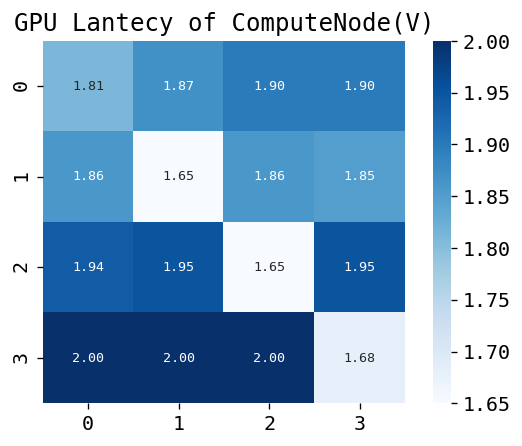

In [12]:
plot_heatmap(lat_vnode, 'GPU Lantecy of ComputeNode(V)', fmt='.2f')